# Placement Prediction
#### Predicting whether a student will get placed or not from 'Placement Data'.

By: Anamika Singh

In [1]:
# IMPORTING REQUIRED LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

The data I'm working on is a small dataset having 215 rows and 14 columns, including the target variable i.e whether a student will get placed or not.

In [2]:
# LOADING THE DATASET

data = pd.read_csv("Placement_Data.csv")

Missing values are usually represented in the form of Nan or null or None in the dataset.

df.info() function can be used to give information about the dataset. This will provide you with the column names along with the number of non – null values in each column.

The second way of finding whether we have null values in the data is by using the isnull() function.

In [3]:
# CHECKING FOR MISSING VALUES

data.info()

#data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


Different methods that you can use to deal with the missing data:

__a) Deleting the columns with missing data__ : This is an extreme case and should only be used when there are many null values in the column as we may lose valuable information on that feature, as we have deleted it completely due to some null values.

__b) Deleting the rows with missing data__ : axis=1 is used to drop the column with `NaN` values, axis=0 is used to drop the row with `NaN` values.

__c) Filling the missing data with a value - Imputation__ : Filling the missing values with a certain number - mean or median value if it’s a numerical variable, mode if it’s a categorical value. You can use the fillna() function to fill the null values in the dataset.

I've done median imputation on the 'Salary' column.

In [4]:
# IMPUTING THE MISSING VALUES

data['salary'].fillna(data['salary'].median(), inplace = True)
data = data.iloc[:, 1:]

# PREVIEWING DATA 

data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,265000.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
# RE-STRUCTURING DATA

move = data.pop('status')
data.insert(13, 'status', move)
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,265000.0,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0,Placed


Using Label Encoding, we replace the categorical value with a numeric value between 0 and the number of classes minus 1. If the categorical variable value contains 5 distinct classes, we use (0, 1, 2, 3, and 4).

Using the preprocessing module from sklearn package and LabelEncoder class.

In [6]:
# ENCODING CATEGORICAL VARIABLES

data['gender'] = le.fit_transform(data['gender'])
data['ssc_b'] = le.fit_transform(data['ssc_b'])
data['hsc_b'] = le.fit_transform(data['hsc_b'])
data['hsc_s'] = le.fit_transform(data['hsc_s'])
data['degree_t'] = le.fit_transform(data['degree_t'])
data['workex'] = le.fit_transform(data['workex'])
data['specialisation'] = le.fit_transform(data['specialisation'])
#data['status'] = le.fit_transform(data['status'])

In [7]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,270000.0,Placed
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,200000.0,Placed
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,250000.0,Placed
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,265000.0,Not Placed
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,425000.0,Placed


The two most popular techniques for scaling numerical data prior to modeling are normalization and standardization. 

__Normalization__ scales each input variable separately to the range 0-1, which is the range for floating-point values where we have the most precision. 

__Standardization__ scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

I've standardized & then normalized the dataset using the scikit-learn object StandardScaler & MinMaxScaler respectively.

In [8]:
# STANDARDIZING DATA

data["gender"] = scaler.fit_transform(data[["gender"]])
data["ssc_p"] = scaler.fit_transform(data[["ssc_p"]])
data["ssc_b"] = scaler.fit_transform(data[["ssc_b"]])
data["hsc_p"] = scaler.fit_transform(data[["hsc_p"]])
data["hsc_b"] = scaler.fit_transform(data[["hsc_b"]])
data["hsc_s"] = scaler.fit_transform(data[["hsc_s"]])
data["degree_p"] = scaler.fit_transform(data[["degree_p"]])
data["degree_t"] = scaler.fit_transform(data[["degree_t"]])
data["workex"] = scaler.fit_transform(data[["workex"]])
data["etest_p"] = scaler.fit_transform(data[["etest_p"]])
data["specialisation"] = scaler.fit_transform(data[["specialisation"]])
data["mba_p"] = scaler.fit_transform(data[["mba_p"]])
data["salary"] = scaler.fit_transform(data[["salary"]])

In [9]:
# NORMALIZING DATA

data["gender"] = scaling.fit_transform(data[["gender"]])
data["ssc_p"] = scaling.fit_transform(data[["ssc_p"]])
data["ssc_b"] = scaling.fit_transform(data[["ssc_b"]])
data["hsc_p"] = scaling.fit_transform(data[["hsc_p"]])
data["hsc_b"] = scaling.fit_transform(data[["hsc_b"]])
data["hsc_s"] = scaling.fit_transform(data[["hsc_s"]])
data["degree_p"] = scaling.fit_transform(data[["degree_p"]])
data["degree_t"] = scaling.fit_transform(data[["degree_t"]])
data["workex"] = scaling.fit_transform(data[["workex"]])
data["etest_p"] = scaling.fit_transform(data[["etest_p"]])
data["specialisation"] = scaling.fit_transform(data[["specialisation"]])
data["mba_p"] = scaling.fit_transform(data[["mba_p"]])
data["salary"] = scaling.fit_transform(data[["salary"]])

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

The scikit-learn Python machine learning library provides an implementation of the train-test split evaluation procedure via the train_test_split() function.

In [10]:
# TRAIN-TEST SPLITTING

from sklearn.model_selection import train_test_split

x = data.iloc[:, :13]
y = data.iloc[:, 13]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Here, I'm applying the K-Nearest Neighbour (KNN) algorithm for classifying the data as per the target variable. KNN algorithm is used for both classification and regression problems. It is based on feature similarity approach.

In [11]:
# APPLYING K-NEAREST NEIGHBOUR CLASSIFIER

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15)

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

Predicting the trained results and evaluating model accuracy.

In [12]:
# PREDICTING RESULTS

pred = knn.predict(x_test)

In [13]:
# ACCURACY SCORE

from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.7441860465116279

Checking the accuracy for different values of 'K' ranging from 1-55 in order to find the highest score.

In [14]:
# DETERMINING ERROR RATE (FOR BEST VALUE OF 'K')

error_rate = []

for i in range(1, 55):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(accuracy_score(y_test, pred_i))
    
np.max(error_rate)

0.8372093023255814

Visualizing the values of K vs the accuracy score on each of them.

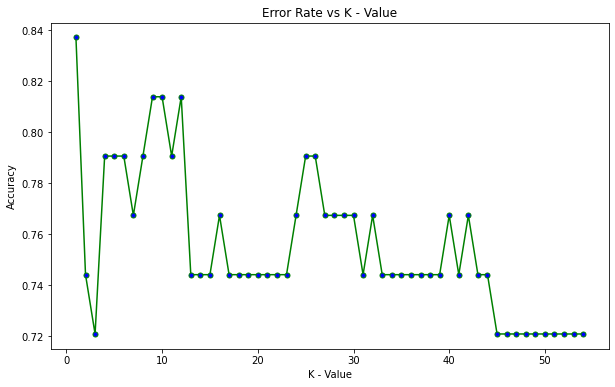

In [15]:
# VISUALIZING ERROR RATE vs K-VALUE

plt.figure(figsize=(10,6))
plt.plot(range(1,55), error_rate, color = 'green', linestyle = '-', marker = 'o', markerfacecolor = 'blue', markersize = 5)
plt.title('Error Rate vs K - Value')
plt.xlabel('K - Value')
plt.ylabel('Accuracy')
plt.show()

In [16]:
# LOGISTING REGRESSION 

from sklearn.linear_model import LogisticRegression
logclassifier = LogisticRegression(random_state = 20)

logclassifier.fit(x_train, y_train)
pred = logclassifier.predict(x_test)
accuracy_score(y_test, pred)

0.8837209302325582

In [17]:
# SUPPORT VECTOR CLASSIFIER

from sklearn.svm import SVC
svcclassifier = SVC(kernel = "rbf", random_state = 20)

svcclassifier.fit(x_train, y_train)
pred = svcclassifier.predict(x_test)
accuracy_score(y_test, pred)

0.8372093023255814

In [18]:
# DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtree = DecisionTreeClassifier(criterion = "gini", max_depth = 3, random_state = 20)

dtree.fit(x_train,y_train)
pred = dtree.predict(x_test)
accuracy_score(y_test, pred)

0.813953488372093

In [19]:
# RANDOM FOREST CLASSIFIER

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 15, random_state = 20) 

RF.fit(x_train, y_train)
pred = RF.predict(x_test)
accuracy_score(y_test, pred)

0.9302325581395349

In [20]:
# GRADIENT BOOSTING CLASSIFIER

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
gb_model = GradientBoostingClassifier(n_estimators = 15, random_state = 20)

gb_model.fit(x_train, y_train)
roc_auc_score(y_test, gb_model.predict_proba(x_test)[:, 1])

0.9948717948717949